In [14]:
#!apt-get update && apt-get install -y graphviz 

In [15]:
#!pip install pandas
#!pip install graphviz
#!pip install lingam

In [3]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(1)


# x3 = np.random.uniform(size=10000)
# x0 = 3.0*x3 + np.random.uniform(size=10000)
# x2 = 6.0*x3 + np.random.uniform(size=10000)
# x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=10000)
# x5 = 4.0*x0 + np.random.uniform(size=10000)
# x4 = 8.0*x0 - 1.0*x2 + np.random.uniform(size=10000)
# X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])

X = pd.read_csv("nhefs.csv")
X = X.fillna(-1).reset_index(drop=True)
X=(X-X.mean())/X.std()
print(X.head())

['1.19.5', '1.1.5', '0.19.1', '1.5.5']
       seqn      qsmk     death     yrdth     modth     dadth       sbp  \
0 -2.176229 -0.596784 -0.492356 -0.492081 -0.433813 -0.427674  1.577755   
1 -2.175962 -0.596784 -0.492356 -0.492081 -0.433813 -0.427674  0.012693   
2 -2.174762 -0.596784 -0.492356 -0.492081 -0.433813 -0.427674 -0.228086   
3 -2.174629 -0.596784  2.029806  1.955552  0.473352  1.495796  0.765126   
4 -2.173695 -0.596784 -0.492356 -0.492081 -0.433813 -0.427674 -0.137794   

        dbp       sex       age  ...  birthcontrol  pregnancies  cholesterol  \
0  1.107638 -1.018902 -0.157372  ...      0.965749    -0.758072    -0.414412   
1  0.308284 -1.018902 -0.650370  ...      0.965749    -0.758072     1.657292   
2  0.058486  0.980846  0.992957  ...     -1.144519     0.329626    -1.211221   
3  0.208365 -1.018902  1.978954  ...      0.965749    -0.758072    -0.872577   
4  0.158405 -1.018902 -0.321705  ...      0.965749    -0.758072    -0.035927   

   hightax82   price71   pric

In [4]:
X

,seqn,qsmk,death,yrdth,modth,dadth,sbp,dbp,sex,age,...,birthcontrol,pregnancies,cholesterol,hightax82,price71,price82,tax71,tax82,price71_82,tax71_82
0,-2.176229,-0.596784,-0.492356,-0.492081,-0.433813,-0.427674,1.577755,1.107638,-1.018902,-0.157372,...,0.965749,-0.758072,-0.414412,-0.222015,0.292966,0.139903,0.307834,0.112656,0.543796,0.453240
1,-2.175962,-0.596784,-0.492356,-0.492081,-0.433813,-0.427674,0.012693,0.308284,-1.018902,-0.650370,...,0.965749,-0.758072,1.657292,-0.222015,0.508079,0.226797,0.813328,0.414368,0.851807,0.847415
2,-2.174762,-0.596784,-0.492356,-0.492081,-0.433813,-0.427674,-0.228086,0.058486,0.980846,0.992957,...,-1.144519,0.329626,-1.211221,-0.222015,-0.516930,-0.203236,-0.752482,-0.521340,-0.587462,-0.373738
3,-2.174629,-0.596784,2.029806,1.955552,0.473352,1.495796,0.765126,0.208365,-1.018902,1.978954,...,0.965749,-0.758072,-0.872577,-0.222015,-0.600013,-0.296416,-0.803219,-0.551578,-0.591560,-0.413156
4,-2.173695,-0.596784,-0.492356,-0.492081,-0.433813,-0.427674,-0.137794,0.158405,-1.018902,-0.321705,...,0.965749,-0.758072,-0.035927,-0.222015,0.508079,0.226797,0.813328,0.414368,0.851807,0.847415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,1.128381,-0.596784,-0.492356,-0.492081,-0.433813,-0.427674,-0.228086,-0.391151,-1.018902,0.089127,...,0.965749,-0.758072,-4.358618,-0.222015,0.272356,0.443107,0.206829,0.354059,-0.086388,0.090600
1625,1.128648,-0.596784,-0.492356,-0.492081,-0.433813,-0.427674,0.042790,0.308284,0.980846,0.253460,...,-1.144519,0.329626,1.039765,-0.222015,0.272356,0.443107,0.206829,0.354059,-0.086388,0.090600
1626,1.129714,-0.596784,-0.492356,-0.492081,-0.433813,-0.427674,-3.719377,-3.738447,0.980846,0.582125,...,-1.144519,0.692192,0.203115,-0.222015,-0.211971,0.000133,-0.398965,0.112656,-0.304971,-0.495933
1627,1.130781,-0.596784,-0.492356,-0.492081,-0.433813,-0.427674,1.457365,0.158405,-1.018902,1.978954,...,0.965749,-0.758072,0.103514,-0.222015,0.272356,0.443107,0.206829,0.354059,-0.086388,0.090600


In [5]:

model = lingam.DirectLiNGAM()
model.fit(X)
dot = make_dot(model.adjacency_matrix_)

# Save png
dot.format = 'png'

dot.render('./dag')

'dag.png'

In [7]:
model.adjacency_matrix_

array([[ 0.   ,  0.   , -0.049, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.666],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ]])

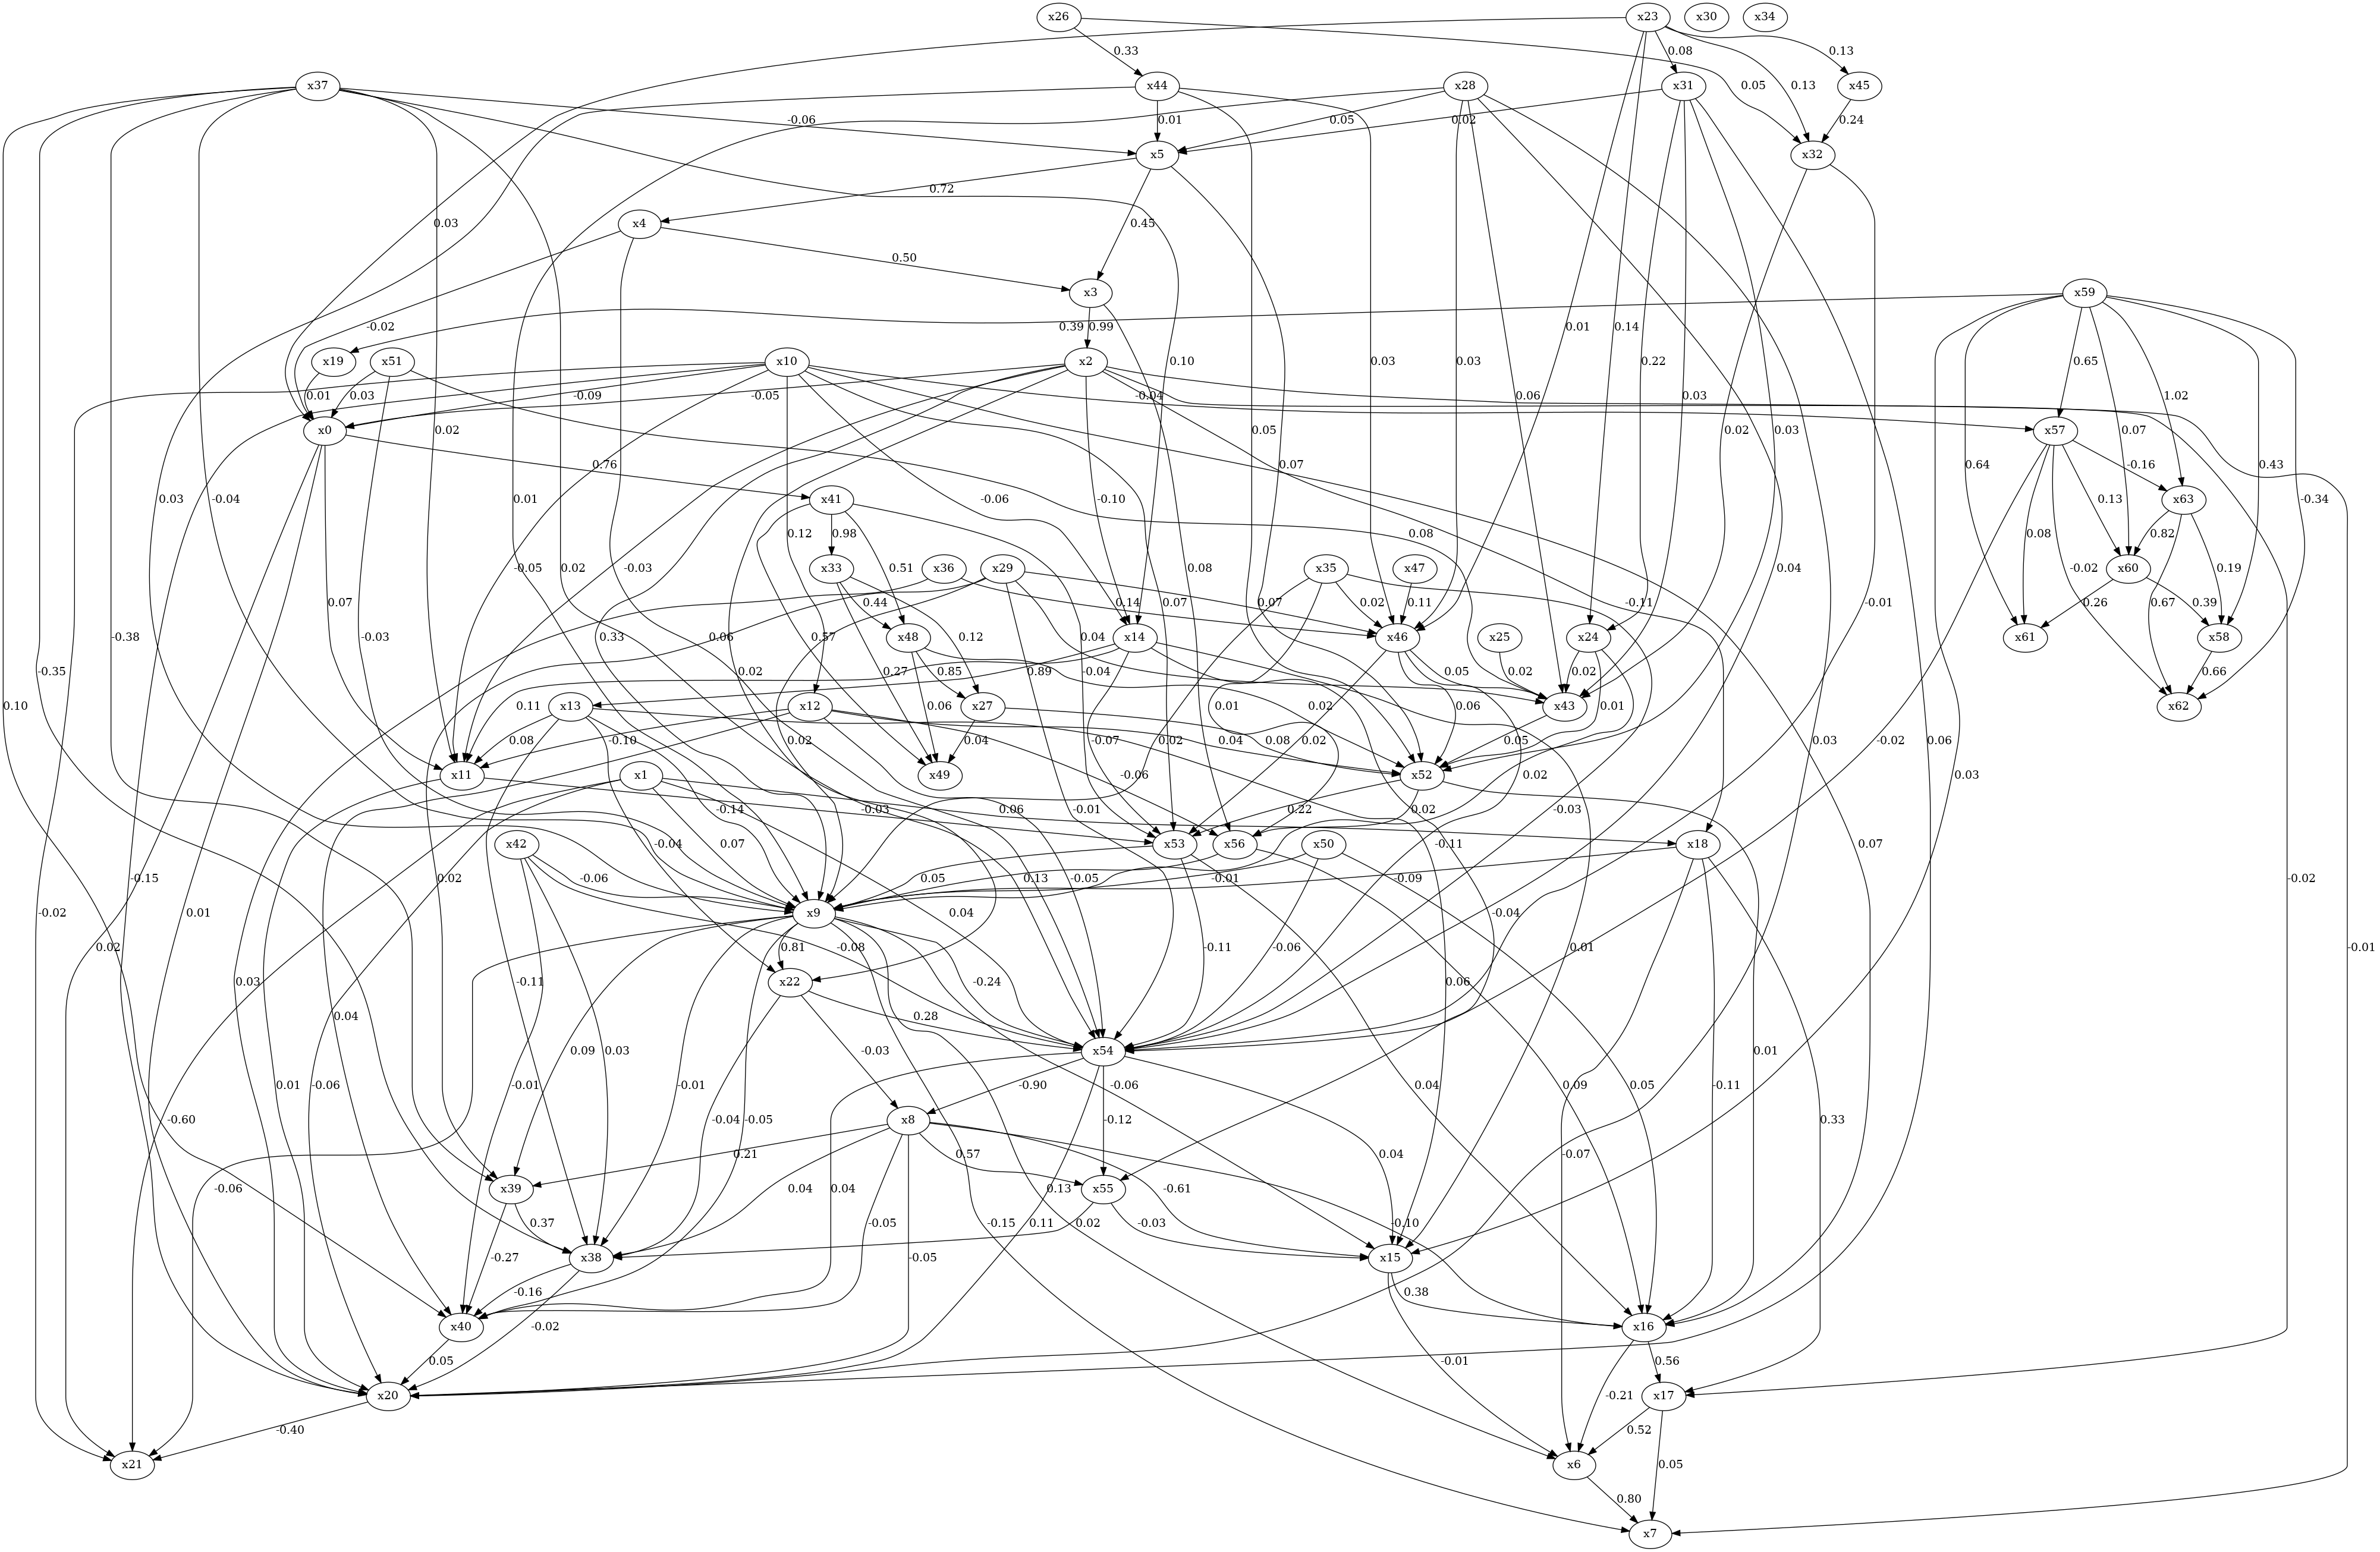

In [6]:
from IPython.display import Image
Image(filename='dag.png') 